# 6주차 과제

### 슬라이드 실행

##### 이번 과제에서는 슬라이드에 코드가 부족하여 인터넷상에 돌아다니는 코드를 활용하였기에 결과가 슬라이드의 내용과 조금 다른 것들이 있습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

슬라이드의 내용처럼 train세트를 가지고 test를 scale하기 때문에 test의 범위가 0~1을 넘어가게 됩니다.

In [15]:
# library import
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer = load_breast_cancer() 

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25, random_state=1)

# library import
from sklearn.preprocessing import MinMaxScaler

# 메소드 호출
scaler = MinMaxScaler()
scaler.fit(X_train)

# data 변환
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 후 데이터셋의 속성
print('size: \n{}'.format(X_train_scaled.shape))
print('스케일 전 최솟값: \n{}'.format(X_train.min(axis=0))) # axis=0 열방향, axis=1 행방향
print('스케일 전 최댓값: \n{}'.format(X_train.max(axis=0)))
print('스케일 후 최솟값: \n{}'.format(X_train_scaled.min(axis=0)))
print('스케일 후 최댓값: \n{}'.format(X_train_scaled.max(axis=0)))

# 스케일이 조정된 후 테스트 데이터의 속성 출력
print('조정 후 특성별 최솟값: \n{}'.format(X_test_scaled.min(axis=0)))
print('조정 후 특성별 최댓값: \n{}'.format(X_test_scaled.max(axis=0)))

size: 
(426, 30)
스케일 전 최솟값: 
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 전 최댓값: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 후 최솟값: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 후 최댓값: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
조정 후 특성별 최솟값: 
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 

특이하게 아래의 결과에서 No Scale이 슬라이드보다 높게 나왔고 Normalizer의 결과가 No Scale보다 더 안좋게 나왔습니다.  

그 이유는 Normalizer는 길이는 상관없고 데이터의 방향만 중요할 때 사용한다고 하였는데, cancer 데이터는 값의 크기 또한 중요하게 작용하기 때문이라고 생각합니다.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

svc = SVC()

# No Scale
svc.fit(X_train, y_train)
print('no scale test accuracy : %.3f' %(svc.score(X_test, y_test)))

# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc.fit(X_train_scaled, y_train)
print('MinMaxScaler test accuracy : %.3f' %(svc.score(X_test_scaled, y_test)))

# RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc.fit(X_train_scaled, y_train)
print('RobustScaler test accuracy : %.3f' %(svc.score(X_test_scaled, y_test)))

# StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc.fit(X_train_scaled, y_train)
print('StandardScaler test accuracy : %.3f' %(svc.score(X_test_scaled, y_test)))

# Normalizer
scaler = Normalizer()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc.fit(X_train_scaled, y_train)
print('Normalizer test accuracy : %.3f' %(svc.score(X_test_scaled, y_test)))

no scale test accuracy : 0.909
MinMaxScaler test accuracy : 0.965
RobustScaler test accuracy : 0.965
StandardScaler test accuracy : 0.965
Normalizer test accuracy : 0.846


In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)

X_scaled = scaler.transform(cancer.data)
from sklearn.decomposition import PCA

# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=2)

# cancer 데이터로 PCA 모델을 구축
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터 변환
X_pca = pca.transform(X_scaled)

print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


people.images의 형태 
(3023, 87, 65)
class 갯수 
62


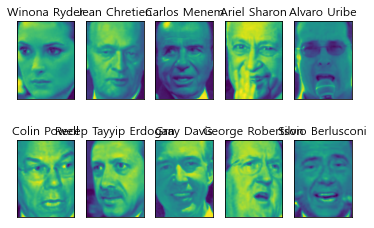

In [19]:
# library import
from sklearn.datasets import fetch_lfw_people
import matplotlib

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7, color=False)
image_shape = people.images[0].shape

print('people.images의 형태 \n{}'.format(people.images.shape)) # people객체의 image 형태: (3023, 87, 65)
print('class 갯수 \n{}'.format(len(people.target_names))) # people객체의 class 갯수, 62

fig, axes = plt.subplots(2, 5, # figure객체와 2x5의 plot객체를 각각 할당
    subplot_kw={'xticks': (), 'yticks': ()}) # subplot의 축 설정; x축 눈굼없게, y축 눈금없게

# axes.ravel() : 리스트를 1차원으로
for target, image, ax in zip(people.target, people.images, axes.ravel()): # people.target, people.images, axes.ravel()에서 하나씩 원소 할당
    ax.imshow(image) # imshow로 그림 출력
    ax.set_title(people.target_names[target]) # 각 subplot의 타이틀
    
plt.gray() # 그림 흑백
plt.show() # 그래프 출력

아래 두 코드의 결과는 PCA를 적용하기 전과 후에 knn을 적용한 것인데 중요한 특성들을 추출하고 나니 정확도가 올라감을 확인했습니다.

In [23]:
mask = np.zeros(people.target.shape, dtype=np.bool) # 3023개의 boolean타입 False 생성

people_unique = np.unique(people.target) # 중복된 값 제외

for target in people_unique: # 중복을 제거한 target리스트에서 한개의 원소 선택
# people.target(3023개의 리스트)중 선택된 원소와 같은 것만 출력 ==> [0] 리스트의 원소로 접근 ==> False의 갯수 50개까지 출력
# 이 논리 값을 mask의 인덱스로 사용 후 True로 변환
    mask[np.where(people.target == target)[0][:50]] = 1 

X_people = people.data[mask] # 훈련 데이터 생성
y_people = people.target[mask] # 테스트 데이터 생성

scaler = MinMaxScaler()
X_people_scaled = scaler.fit_transform(X_people) # 전처리 메소드 적용

# 머신 러닝 library import
from sklearn.neighbors import KNeighborsClassifier

# 전처리한 데이터를 분할
X_train, X_test, y_train, y_test = train_test_split(X_people_scaled, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1) # 이웃의 수
knn.fit(X_train, y_train) # 모델 학습

print('knn.score(x_test, y_test) \n최근접이웃의 일반화 세트 점수: {:.3f}'.format(knn.score(X_test, y_test)))

knn.score(x_test, y_test) 
최근접이웃의 일반화 세트 점수: 0.248


In [26]:
# library import
from sklearn.decomposition import PCA

# PCA 모델 생성 및 적용
pca = PCA(n_components=100, whiten=True, random_state=0) # 주성분 갯수, whitening option, 랜덤상태
pca.fit(X_train) # PCA 학습

X_train_pca = pca.transform(X_train) # PCA를 데이터에 적용
X_test_pca = pca.transform(X_test)

# PCA를 적용한 데이터 형태
print('X_train_pca.shape train형태:{}'.format(X_train_pca.shape)) # (1547, 100)
print('X_test_pca.shape test형태:{}'.format(X_test_pca.shape)) # (516, 100)

# 머신 러닝 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=1) # 이웃의 수
knn.fit(X_train_pca, y_train) # 모델 학습
print('테스트 세트 정확도: \n{:.3f}'.format(knn.score(X_test_pca, y_test))) # 0.314

X_train_pca.shape train형태:(1547, 100)
X_test_pca.shape test형태:(516, 100)
테스트 세트 정확도: 
0.314


In [34]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7, color=False) # 겹치지 않는 최소사람 수, 사이즈비율, 흑백
images_shape = people.images[0].shape # 이미지 한개의 사이즈 저장

idx = np.zeros(people.target.shape, dtype=np.bool) # False배열 3023개 설정

people_target_unq = np.unique(people.target) # target에서 unique값 할당

for target in people_target_unq: # perploe_target_unq에서 원소 하나씩 target에 할당

    idx[np.where(people.target == target)[0][:50]] = 1 # 전체 리스트 3023개에서 target과 일치하는 것의 수가를 50개 까지 True로 변경

X_people = people.data[idx] # 훈련 데이터

y_people = people.target[idx] # 테스트 데이터

scaler = MinMaxScaler()

X_people_scaled = scaler.fit_transform(X_people) # 훈련 데이터를 적용하여 전처리

X_train, X_test, y_train, y_test = train_test_split(X_people_scaled, y_people, stratify=y_people, random_state=0, test_size=0.3)

C:\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


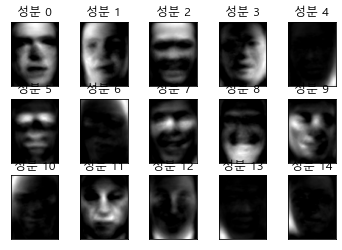

In [36]:
# library import , model 생성 , 학습
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

# 모델 적용
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

# 시각화
fig, axes = plt.subplots(3, 5, # axes에 plots객체를 3x5 만큼 할당
                         subplot_kw={'xticks':(), 'yticks':()}) # subplot 축 없애기

for i, (comp, ax) in enumerate(zip(nmf.components_, axes.ravel())): # nmf.components_, axes.ravel()에서 하나씩 comp와 ax에 인덱스부여
    ax.imshow(comp.reshape(images_shape)) # images_shape= (87, 65)
    ax.set_title('성분 {}'.format(i)) # subplot 타이틀

plt.gray() # 그림 흑백
plt.show()

아래 10개의 사진은 성분 3이 큰 사진들인데 확실히 얼굴이 오른쪽으로 돌아간 모습이 많은 것을 확인했습니다.

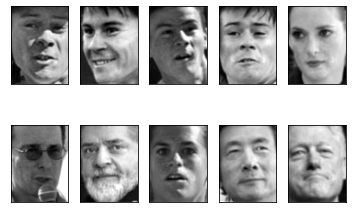

In [39]:
idx = np.argsort(X_train_nmf[:, 3])[::-1] # [start : end : stpe] , step=-1 :내림차순
fig, axes = plt.subplots(2, 5, # subplots객체 (2x5) 를 axes에 할당
                         subplot_kw={'xticks':(), 'yticks':()}) # subplots에 축 없애기

for idx, ax in zip(idx, axes.ravel()): # idx와 aexs.ravel()을 하나씩 idx, ax에 할당
    ax.imshow(X_train[idx].reshape(images_shape))

plt.gray() # 그림 흑백
plt.show() # 그림 출력

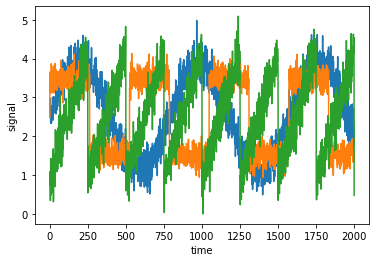

In [43]:
# matplotlib 설정
matplotlib.rc('font', family='AppleGothic') # 한글 출력
plt.rcParams['axes.unicode_minus'] = False # 축 - 설정

# data load
S = mglearn.datasets.make_signals() 

# visualization
plt.plot(S) # 라인그래프
plt.xlabel('time') # x 축
plt.ylabel('signal') # y 축
plt.show() # 그래프 출력

pca와 nmf로 signal 데이터를 전처리한 후 복원한 모습인데 확실히 nmf가 여러 signal에 대해서 잘 분리해서 복원한 모습을 보였고, pca는 세 신호 중에서 변동이 가장 큰 신호를 잘 찾아냄을 확인하였습니다.

(에러는 한글에 관련된 에러인 것 같습니다.)

X.shape 
측정데이터 형태:(2000, 100)
S_.shape 
복원한 신호 데이터 형태: (2000, 3)


C:\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52376 missing from cur

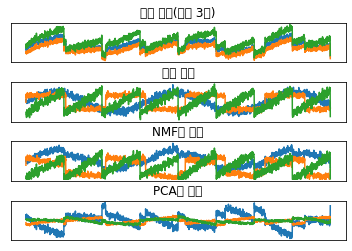

In [44]:
A = np.random.RandomState(0).uniform(size=(100, 3)) # 100x3  형태의 균일분포에서 랜덤 데이터 생성
X = np.dot(S, A.T) # S(2000x3)에 A에 전치행렬(3X100)을 행렬 곱

print('X.shape \n측정데이터 형태:{}'.format(X.shape)) # (2000, 3)

nmf = NMF(n_components=3, random_state=0) # 주성분 3개, 랜덤상태
S_ = nmf.fit_transform(X) # nmf적용
print('S_.shape \n복원한 신호 데이터 형태: {}'.format(S_.shape)) # (2000, 3)

pca = PCA(n_components=3) # PCA주성분 3
H = pca.fit_transform(X) # PCA적용

# visualization
models = [X, S, S_, H] 
names = ['측정 신호(처음 3개)', '원본 신호', 'NMF로 복원' ,'PCA로 복원']
fig, axes = plt.subplots(4, # subplot의 객체4개를 axes에 할당
                         gridspec_kw={'hspace':0.5}, # 수평간격 비율
                         subplot_kw={'xticks':(), 'yticks':()}) # subplot의 축 눈금 없애기

for model, name, ax in zip(models, names, axes.ravel()): # models와 names, axes.ravel()에서 하나씩 선택
    ax.set_title(name) # 타이틀 이름
    ax.plot(model[:,:3]) # 모든행, :3 ==> 3개의 열

plt.show() # 그래프 출력

슬라이드의 결과와 클러스터는 동일하게 생성되었지만 1이 0, 0이 1로 분류됨을 확인하였습니다.(클러스터의 이름이 다름)

In [45]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 2차원 데이터를 생성
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

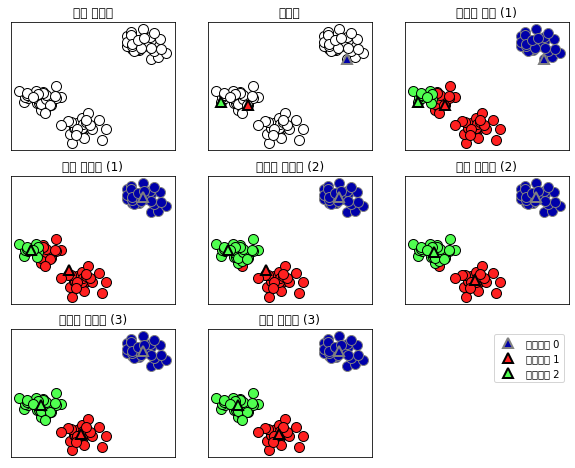

In [50]:
matplotlib.rc('font', family='AppleGothic') # 한글 출력

plt.rcParams['axes.unicode_minus'] = False #  축 -

mglearn.plots.plot_kmeans_algorithm()

plt.show()

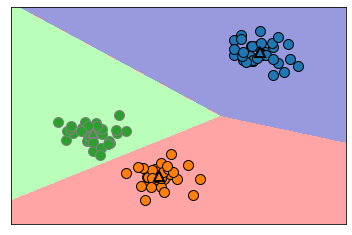

In [51]:
mglearn.plots.plot_kmeans_boundaries()

plt.show()

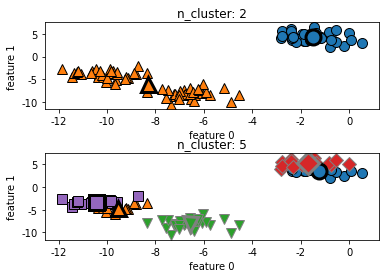

In [55]:
fig, axes = plt.subplots(2, gridspec_kw={'hspace':0.5}) # gridspec_kw: 그래프 수평간격

n_clusters_set = [2, 5] 

for n, ax in zip(n_clusters_set, axes.ravel()):
    kmeans = KMeans(n_clusters=n) # 클러스터 갯수
    kmeans.fit(X)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y=kmeans.labels_, ax=ax) # x, y, group, ax = plot객체
    mglearn.discrete_scatter(

        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], y=np.unique(kmeans.labels_), # x, y, group

        markeredgewidth=3, ax=ax, s=15) # 두께, 그림객체, 사이즈
    ax.set_title('n_cluster: {}'.format(n)) # title
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

plt.show()

Kmeans를 적용하면 원형에 가까운 모양으로 클러스터링이 된다는 것을 확인했습니다.

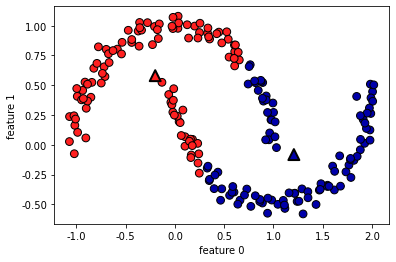

In [58]:
from sklearn.datasets import make_moons

X_m, y_m = make_moons(n_samples=200, noise=0.05, random_state=0) # 갯수, 퍼짐정도, 랜덤상태

kmeans = KMeans(n_clusters=2).fit(X_m) # 모델 객체 생성 및 학습

y_m_pred = kmeans.predict(X_m) # 모델 적용

plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_pred, s=60, edgecolors='black', cmap=mglearn.cm2) # x, y, group, 점크기 60%, 테두리색 black, palette

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], # x, y
            marker='^', s=120, linewidth=2, edgecolors='k', c=[mglearn.cm2(0), mglearn.cm2(1)]) # marker,  점크기 120%, 두께, 테두리색, 색상 
plt.xlabel('feature 0')
plt.ylabel('feature 1')

plt.show()

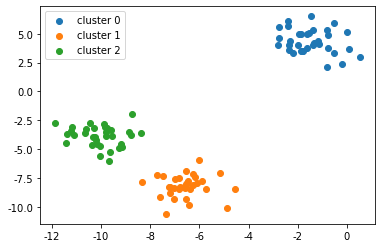

In [59]:
from sklearn.cluster import AgglomerativeClustering

# dataset
X, y = make_blobs(random_state=1)

# 모델 생성 및 학습
agg = AgglomerativeClustering(n_clusters=3)
assign = agg.fit_predict(X)

# 배열 x 오른쪽에 열 한개 추가
a = assign.reshape(-1, 1)
X1 = np.hstack([X, a])

# 각 클래스별로 데이터 추출
X_0 = X1[X1[:, 2]==0, :]
X_1 = X1[X1[:, 2]==1, :]
X_2 = X1[X1[:, 2]==2, :]

# 시각화
plt.scatter(X_0[:, 0], X_0[:, 1], cmap=mglearn.cm3)
plt.scatter(X_1[:, 0], X_1[:, 1], cmap=mglearn.cm3)
plt.scatter(X_2[:, 0], X_2[:, 1], cmap=mglearn.cm3)

plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc=2)

plt.show()

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

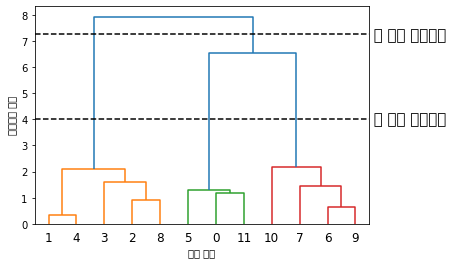

In [61]:
# library import
from scipy.cluster.hierarchy import dendrogram, ward

# dataset
X, y = make_blobs(random_state=0, n_samples=12)

### 데이터 배열 x에 ward 함수를 적용
### scipy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 반환
linkage_array = ward(X)

dendrogram(linkage_array)

ax = plt.gca() # get current axes

bounds = ax.get_xbound() # x축 데이터(처음과 끝), 즉 최소/최대값을 가진 (1,2)리스트

ax.plot(bounds, [7.25, 7.25], linestyle='--', c='k') # 임의로 라인 생성

ax.plot(bounds, [4, 4], linestyle='--', c='k')

ax.text(bounds[1], 7.25, ' 두 개의 클러스터', va='center', fontdict={'size':15}) # bounds: x축 끝

ax.text(bounds[1], 4, ' 세 개의 클러스터', va='center', fontdict={'size':15})

plt.xlabel('샘플 번호')

plt.ylabel('클러스터 거리')

plt.show()

12개의 샘플 중에서 DBSCAN의 결과로 기본값인 eps=0.5, min_samples=5일 때, 모두 noise로 된 것을 통해  

각각의 샘플들이 어느 정도 분산되어 있음을 추측하였습니다.

In [62]:
# library import
from sklearn.cluster import DBSCAN

# dataset
X, y = make_blobs(n_samples=12, random_state=0)

# 모델생성 및 클러스터 레이블
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

# 클러스터 레이블 출력
print('clusters \n클러스터레이블: {}'.format(clusters))

clusters 
클러스터레이블: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


적당한 값(1.5 혹은 2.0)일 때는 잘 분류가 된 모습이며, eps의 값이 너무 클 때는 아래와 같이 모두 하나의 클러스터로 군집됨을 확인했습니다.

In [63]:
dbscan = DBSCAN(eps=1.0, min_samples=2)
clusters = dbscan.fit_predict(X)

print('clusters \n클러스터레이블: {}'.format(clusters))

dbscan = DBSCAN(eps=1.5, min_samples=2)
clusters = dbscan.fit_predict(X)

print('clusters \n클러스터레이블: {}'.format(clusters))

dbscan = DBSCAN(eps=2.0, min_samples=2)
clusters = dbscan.fit_predict(X)

print('clusters \n클러스터레이블: {}'.format(clusters))

dbscan = DBSCAN(eps=3.0, min_samples=2)
clusters = dbscan.fit_predict(X)

print('clusters \n클러스터레이블: {}'.format(clusters))

clusters 
클러스터레이블: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
clusters 
클러스터레이블: [0 1 1 1 1 0 2 2 1 2 2 0]
clusters 
클러스터레이블: [0 1 1 1 1 0 0 0 1 0 0 0]
clusters 
클러스터레이블: [0 0 0 0 0 0 0 0 0 0 0 0]


moon데이터에 대한 DBSCAN결과입니다.

np.unique(clusters_MMS)
예측한 레이블: [0]
np.unique(clusters_ss)
예측한 레이블:[0 1]


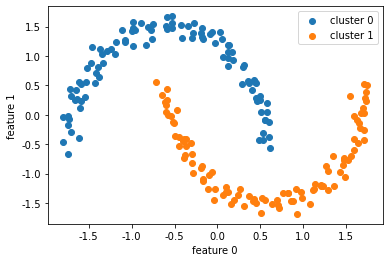

In [65]:
# dataset
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# MinMaxScaler 메소드로 전처리
scaler_MMS = MinMaxScaler().fit(X)
X_scaled_MMS = scaler_MMS.transform(X) # 전처리 메소드를 훈련데이터에 적용

dbscan = DBSCAN() # 모델생성

clusters_MMS = dbscan.fit_predict(X_scaled_MMS) # 모델 학습

print('np.unique(clusters_MMS)\n예측한 레이블: {}'.format(np.unique(clusters_MMS))) # [0]

### 예측한 레이블이 0으로 전부 하나의 클러스터로 표현
### MinMaxScaler전처리가 적합하지 않음

scaler_ss = StandardScaler().fit(X)
X_scaled_ss = scaler_ss.transform(X) 

dbscan = DBSCAN()

clusters_ss = dbscan.fit_predict(X_scaled_ss)

print('np.unique(clusters_ss)\n예측한 레이블:{}'.format(np.unique(clusters_ss))) # [0 ,1]

### 2차원 데이터셋을 0과 1로 구분했기 때문에 전처리가 잘되었음을 확인



# visualization
df = np.hstack([X_scaled_ss, clusters_ss.reshape(-1, 1)]) # x_scaled_ss 오른쪽에 1열 붙이기

df_ft0 = df[df[:,2]==0, :] # 클러스터 0 추출
df_ft1 = df[df[:,2]==1, :] # 클러스터 1 추출



# matplotlib로 그래프 그리기
plt.scatter(df_ft0[:, 0], df_ft0[:, 1], label='cluster 0', cmap='Pairs') # x, y, label, 색상
plt.scatter(df_ft1[:, 0], df_ft1[:, 1], label='cluster 1', cmap='Pairs')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend()

plt.show()

ARI의 결과는 DBSCAN이 가장 군집도 잘 하고 평가 값이 높았습니다.

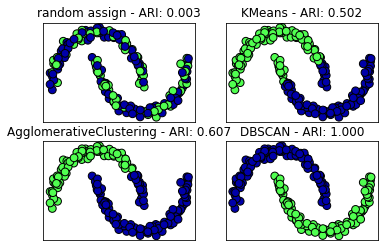

In [67]:
# library import
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score

# dataset
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# pre-processing
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# model list
algorithms = [KMeans(n_clusters=2),
              AgglomerativeClustering(n_clusters=2),
                      DBSCAN()]

kmean_pred = algorithms[0].fit_predict(X_scaled)

# random cluster
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

### visualization
fig, axes = plt.subplots(2, 2, subplot_kw={'xticks':(), 'yticks':()})

axes[0,0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='k')

axes[0,0].set_title('random assign - ARI: {:.3f}'.format(
    adjusted_rand_score(y, random_clusters))) # 실제, 모델로 구한 클러스터

axes[0,1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmean_pred,
                  cmap=mglearn.cm3, s=60, edgecolors='k')

axes[0,1].set_title('{} - ARI: {:.3f}'.format(algorithms[0].__class__.__name__, #__class__.__name__ ==> 클래스에서 이름 속성
                                              adjusted_rand_score(y, kmean_pred)))

for ax, algorithm in zip(axes.ravel()[2:], algorithms[1:]):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='k')
    ax.set_title('{} - ARI: {:.3f}'.format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

plt.show()

Silhouette Coefficient로 군집평가를 했을 때, 분명히 DBSCAN이 가장 잘 군집시켰음에도 불구하고 그 값이 낮게 나왔습니다.  

그 이유는 Silhouette score는 원형일 때 좋은 값을 보이기 때문입니다.

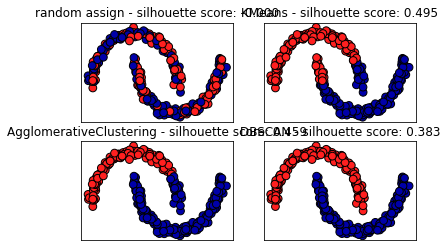

In [70]:
# library import
from sklearn.metrics.cluster import silhouette_score

# datasets
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

# pre-processing
scaler = StandardScaler().fit(X)

X_scaled = scaler.transform(X)

# random cluster
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(0, 2, size=len(X)) # randint(low, high, size)

# K-Means 모델
kmeans = KMeans(n_clusters=2)
kmeans_pred = kmeans.fit_predict(X_scaled)

### visualization
fig, axes = plt.subplots(2, 2,
                         subplot_kw={'xticks':(), 'yticks':()})

ax = axes.ravel()



# random cluster 그리기
ax[0].scatter(X_scaled[:, 0], X_scaled[:,1], c=random_clusters,
            cmap=mglearn.cm2, edgecolors='k', s=60)

ax[0].set_title('random assign - silhouette score: {:.3f}'.format(silhouette_score(X_scaled, random_clusters))) # silhouette_score(훈련데이터, 예측한 클러스터)



# K-Means 그리기
ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_pred,
           cmap=mglearn.cm2, edgecolors='k', s=60)

ax[1].set_title('{} - silhouette score: {:.3f}'.format(kmeans.__class__.__name__,
                                                 silhouette_score(X_scaled, kmeans_pred)))



# AgglomerativeClustering과 DBSCAN 그리기
algorithms = [AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, model in zip(ax[2:], algorithms):
    cluster = model.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster,
               cmap=mglearn.cm2, edgecolors='k', s=60)

    ax.set_title('{} - silhouette score: {:.3f}'.format(model.__class__.__name__,
                                                  silhouette_score(X_scaled, cluster)))

plt.show()

In [74]:
# dataset
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7, color=False) 
people_image = people.images[0].shape 

# 특성의수를 50개까지
idx = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    idx[np.where(people.target == target)[0][:50]] = 1


# 데이터 분할
X_people = people.data[idx]
y_people = people.target[idx]

# preprocessing
scaler = MinMaxScaler()
X_people_scaled = scaler.fit_transform(X_people) # 전처리 메소드로 원래데이터 적용

In [75]:
# PCA 주성분 분석
pca = PCA(n_components=100, whiten=True, random_state=0) 
pca.fit_transform(X_people_scaled) # 모델 fitting
X_pca = pca.transform(X_people_scaled) # 적용한 모델을 원래 데이터에 적용

# NMF 분석
nmf = NMF(n_components=100, random_state=0)
nmf.fit_transform(X_people_scaled) # 모델 fitting
X_nmf = nmf.transform(X_people_scaled) # 적용한 모델을 원래 데이터에 적용

# DBSCAN Agglomerative Algorithm
dbscan = DBSCAN() 
labels_pca = dbscan.fit_predict(X_pca) # pca를 군집화
labels_nmf = dbscan.fit_predict(X_nmf) # nmf를 군집화

print('\n레이블 종류: \npca: {}\nnmf: {}'.format(np.unique(labels_pca), np.unique(labels_nmf))) # [-1], 

### PCA, NMF 모두 레이블이 -1뿐임 ==> DBSCAN에 의해 noise point로 처리
### solution:
### 1. eps값을 크게 ==> 데이터 point의 이웃의수 증가
### 2. min_samples 값을 작게 ==> cluster에 모을 point 수를 감소

C:\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"



레이블 종류: 
pca: [-1]
nmf: [-1]


DBSCAN의 eps값을 바꾸면서 군집을 시킨 결과입니다. 각각의 결과를 통해서 몇 개의 그룹으로 군집되었는지를 알 수 있습니다.  

추가로 맨 마지막에 사진은 noise로 판단된 사진들인데 슬라이드 내용과 마찬가지로 

pca ==> n_samples: 3, eps: 0.500 - [-1]
nmf ==> n_samples: 3, eps: 0.500 - [-1  0]

pca ==> n_samples: 3, eps: 0.700 - [-1]
nmf ==> n_samples: 3, eps: 0.700 - [-1  0  1  2  3  4  5  6  7  8  9 10]

pca ==> n_samples: 3, eps: 0.900 - [-1]
nmf ==> n_samples: 3, eps: 0.900 - [-1  0  1  2  3]

pca ==> n_samples: 3, eps: 1.000 - [-1]
nmf ==> n_samples: 3, eps: 1.000 - [-1  0]

pca ==> n_samples: 3, eps: 5.000 - [-1]
nmf ==> n_samples: 3, eps: 5.000 - [0]

pca ==> n_samples: 3, eps: 9.000 - [-1  0  1  2]
nmf ==> n_samples: 3, eps: 9.000 - [0]

pca ==> n_samples: 3, eps: 15.000 - [-1  0]
nmf ==> n_samples: 3, eps: 15.000 - [0]

pca ==> n_samples: 3, eps: 17.000 - [-1  0]
nmf ==> n_samples: 3, eps: 17.000 - [0]

레이블 종류: 
pca: [-1  0]
nmf: [-1  0]
클러스터별 포인트 수:
pca: [  31 2032]
nmf: [ 144 1919]


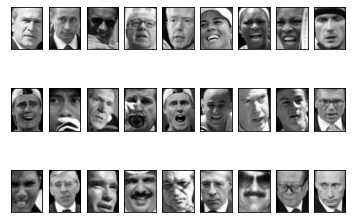

In [76]:
for eps in [0.5, 0.7, 0.9, 1, 5, 9, 15, 17]: # eps 목록
    dbscan = DBSCAN(min_samples=3, eps=eps)
    labels_pca = dbscan.fit_predict(X_pca)
    labels_nmf = dbscan.fit_predict(X_nmf)
    print('pca ==> n_samples: {}, eps: {:.3f} - {}'.format(3, eps, np.unique(labels_pca)))
    print('nmf ==> n_samples: {}, eps: {:.3f} - {}\n'.format(3, eps, np.unique(labels_nmf)))

# DBSCAN -- pca
dbscan = DBSCAN(min_samples=3, eps=15)
labels_pca = dbscan.fit_predict(X_pca)

# DBSCAN -- NMF
dbscan = DBSCAN(min_samples=3, eps=1)
labels_nmf = dbscan.fit_predict(X_nmf)

print('레이블 종류: \npca: {}\nnmf: {}'.format(np.unique(labels_pca), np.unique(labels_nmf))) # (-1, 0)

pca_count = np.bincount(labels_pca + 1) # bincount는 음수는 표현할 수없으니 1을 더함
nmf_count = np.bincount(labels_nmf + 1)

print('클러스터별 포인트 수:\npca: {}\nnmf: {}'.format(pca_count, nmf_count))

### visualization
noise_pca = X_people[labels_pca == -1] # noise 값만 추출
noise_nmf = X_people[labels_nmf == -1]

fig, axes = plt.subplots(3, 9,
                        subplot_kw={'xticks':(), 'yticks':()},
                        gridspec_kw={'hspace':0.5})

for image, ax in zip(noise_pca, axes.ravel()):
    ax.imshow(image.reshape(people_image))

plt.gray()
plt.show()

### 조정 및 테스트

"어떤 임의의 데이터를 가지고 클러스터링 했을 때 어떤 식으로 데이터가 군집되어 있는지 알 수 있을까?" 라는 질문을 가지고 make_blobs의 random_state에 임의의 값을 넣어놓고 DBSCAN를 한 결과입니다.  

그 결과 3개의 클러스터가 나왔고,이를 확인하기 위해 그래프를 그린 결과 명확하게 구분되는 3개의 클러스터를 확인하였습니다.

In [77]:
X, y = make_blobs(random_state=37)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_train)

print('np.unique(clusters_ss)\n예측한 레이블:{}'.format(np.unique(clusters)))

np.unique(clusters_ss)
예측한 레이블:[-1  0  1]


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


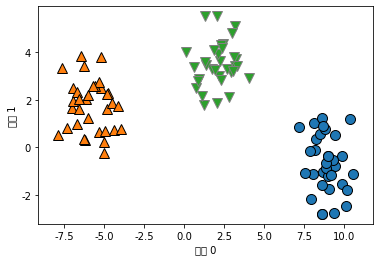

In [78]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

"아래의 과정은 복원한 데이터에 대해서 다시 NMF를 시행하면 어떻게 되는가?"라는 질문을 가지고 테스트한 결과인데 원본을 10개의 특징을 뽑아서 복원했을 때는 정상적인 결과가 나왔지만, 이 결과를 다시 5개의 특징을 뽑아서 복원한 결과 알아보기 힘든 조금 독특한 결과가 나왔습니다.  

그렇지만 올라갈 때 같이 올라가고 내려갈 때 같이 내려가는 것으로 보아 특징은 잘 파악함을 확인했습니다.

X.shape 
측정데이터 형태:(2000, 100)


C:\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


S_.shape 
복원한 신호 데이터 형태: (2000, 10)


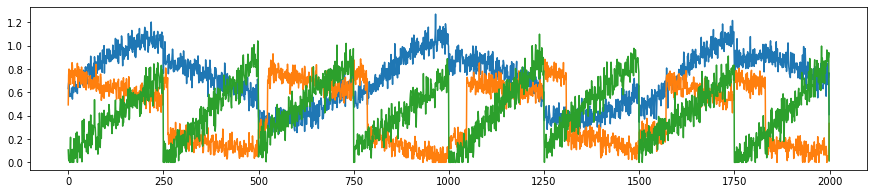

In [91]:
S = mglearn.datasets.make_signals()

A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)

print('X.shape \n측정데이터 형태:{}'.format(X.shape))

nmf = NMF(n_components=10, random_state=0) # 주성분 3개, 랜덤상태
S_ = nmf.fit_transform(X) # nmf적용
print('S_.shape \n복원한 신호 데이터 형태: {}'.format(S_.shape)) # (2000, 3)

fig = plt.figure(figsize=(15, 3)) 
ax = plt.subplot()

ax.plot(S_[:,:3])

plt.show() # 그래프 출력

S_.shape 
복원한 신호 데이터 형태: (2000, 5)


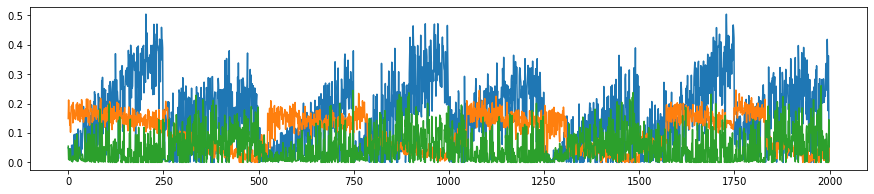

In [94]:
nmf = NMF(n_components=5, random_state=0)
S_ = nmf.fit_transform(S_) # nmf적용
print('S_.shape \n복원한 신호 데이터 형태: {}'.format(S_.shape))

fig = plt.figure(figsize=(15, 3)) 
ax = plt.subplot()

ax.plot(S_[:,:3])

plt.show() # 그래프 출력

아래는 MinMaxScaler를 이용하여 iris 데이터를 전처리 하기 전후에 그 정확도가 얼마나 차이가 생기는지  

를 확인하기 위해서 작성한 코드입니다.  

처음에 랜덤포레스트로 했을 때는 테스트 정확도 높고 스케일 전후가 크게 차이가 나지 않아서 knn으로 다시 진행하였는데,  

knn도 그 값이 같은 것으로 보아 iris 데이터는 원본이 잘 scale되어있을 것이라고 예측하였습니다.

In [95]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
                                                   random_state=0)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test, y_test)))

테스트 세트 정확도: 0.974



In [96]:
scaler = MinMaxScaler()
scaler.fit(X_train)

# data 변환
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

forest.fit(X_train_scaled,y_train)

print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test_scaled, y_test)))

테스트 세트 정확도: 0.974



In [97]:
knn = KNeighborsClassifier(n_neighbors=1) # 이웃의 수
knn.fit(X_train, y_train) # 모델 학습

print('테스트 세트 정확도: {:.3f}\n'.format(knn.score(X_test, y_test)))

테스트 세트 정확도: 0.974



In [98]:
knn.fit(X_train_scaled,y_train)

print("테스트 세트 정확도: {:.3f}\n".format(knn.score(X_test_scaled, y_test)))

테스트 세트 정확도: 0.974



추가적으로 여러가지 테스트를 해보고자 하였습니다. 다만, 비지도학습이(혹은 전처리가) 어떤 데이터에 대해서 어떻게 작용하는지 아직 제대로 이해하지 못해서 조금 더 학습이 필요함을 느꼈습니다.